In [1]:
import numpy as np
import pandas as pd

# Pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn 
import torchvision.transforms as transforms

# Plots

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex, clear_output

## matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## seaborn
import seaborn as sns
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':14,'axes.labelsize':12})
sns.set_style('white')
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<font size="+2"><b>Tensor and Matrices</b></font>
</div>

A tensor is often referred to as an object that describes a relationship between a set of vector space objects. Similarly, in PyTorch mathematical matrices are called **tensors**.

For <font color='Blue'><b>example</b></font>, an array is defined as follows in NumPy.

In [2]:
A = np.random.randint(10, size=(3, 3))
display(Latex(r'Matrix $A$ ='))
display(A)

<IPython.core.display.Latex object>

array([[3, 4, 9],
       [6, 1, 2],
       [9, 8, 7]])

However, a tensor is defined as follows.

In [3]:
T = torch.Tensor(A)
display(Latex(r'Tensor $T$ ='))
display(T)

<IPython.core.display.Latex object>

tensor([[3., 4., 9.],
        [6., 1., 2.],
        [9., 8., 7.]])

The shape of $A$ and $T$

In [4]:
pd.DataFrame({'Object':['A','B'], 'Type': [type(A), type(T)], 'Shape': [A.shape, T.shape]}).style.hide_index()

Object,Type,Shape
A,,"(3, 3)"
B,,"torch.Size([3, 3])"


There are a lot of similarities between NumPy and torch. For example, we could

In [5]:
T = torch.randint(10, size=(3, 3))
display(Latex(r'Tensor $T$ ='))
display(T)
display(Latex(r'Matrix $A$ ='))
A = np.array(T)
display(A)

<IPython.core.display.Latex object>

tensor([[6, 5, 3],
        [8, 0, 0],
        [8, 4, 8]])

<IPython.core.display.Latex object>

array([[6, 5, 3],
       [8, 0, 0],
       [8, 4, 8]], dtype=int64)

Some other similarities:

In [6]:
print(Fore.BLUE+ Style.BRIGHT + 'Numpy ones:')
display(np.ones((2,2)))

print(Fore.RED+ Style.BRIGHT + 'Toruch ones:')
display(torch.ones((2,2)))

print(Fore.BLUE+ Style.BRIGHT + 'Tensor to Array:')
display(np.asarray(T))

print(Fore.RED+ Style.BRIGHT + 'Array to Tensor:')
display(torch.from_numpy(A))

Numpy ones:


array([[1., 1.],
       [1., 1.]])

Toruch ones:


tensor([[1., 1.],
        [1., 1.]])

Tensor to Array:


array([[6, 5, 3],
       [8, 0, 0],
       [8, 4, 8]], dtype=int64)

Array to Tensor:


tensor([[6, 5, 3],
        [8, 0, 0],
        [8, 4, 8]])

See this [link](https://pytorch.org/tutorials/) for more details.

<div class="alert alert-block alert-success">
<font size="+2"><b>
Basic (Matrix) Algebra with Torch    
</b></font>
</div>

Let $S$ and $T$ be two tensors

In [7]:
S = torch.randint(10, size=(4, 4))
T = torch.randint(10, size=(4, 4))
print(Fore.BLUE+ Style.BRIGHT + 'S=')
display(S)

print(Fore.RED+ Style.BRIGHT + 'T=')
display(T)

S=


tensor([[2, 6, 5, 7],
        [9, 9, 7, 4],
        [8, 9, 5, 1],
        [4, 1, 8, 7]])

T=


tensor([[6, 1, 5, 4],
        [7, 8, 1, 7],
        [6, 2, 6, 7],
        [2, 4, 4, 7]])

* **Addition**: ```torch.add(S,T)``` or ```S.add(T)```or ```S + T```
* **Subtraction**: ```torch.sub(S,T)``` or```S.sub(T)``` or  ```S - T```
* **Element wise Multiplication**: ```torch.mul(S,T)``` or  ```S * T ```
* **Element wise Division**: ```torch.div(S,T)``` or ```S / T ```

In [8]:
print(Fore.BLUE+ Style.BRIGHT + 'Addition:')
display(torch.add(S,T))
display(S.add(T))
display(S+T)

Addition:


tensor([[ 8,  7, 10, 11],
        [16, 17,  8, 11],
        [14, 11, 11,  8],
        [ 6,  5, 12, 14]])

tensor([[ 8,  7, 10, 11],
        [16, 17,  8, 11],
        [14, 11, 11,  8],
        [ 6,  5, 12, 14]])

tensor([[ 8,  7, 10, 11],
        [16, 17,  8, 11],
        [14, 11, 11,  8],
        [ 6,  5, 12, 14]])

In [9]:
print(Fore.BLUE+ Style.BRIGHT + 'Subtraction:')
display(torch.sub(S,T))
display(S.sub(T))
display(S-T)

Subtraction:


tensor([[-4,  5,  0,  3],
        [ 2,  1,  6, -3],
        [ 2,  7, -1, -6],
        [ 2, -3,  4,  0]])

tensor([[-4,  5,  0,  3],
        [ 2,  1,  6, -3],
        [ 2,  7, -1, -6],
        [ 2, -3,  4,  0]])

tensor([[-4,  5,  0,  3],
        [ 2,  1,  6, -3],
        [ 2,  7, -1, -6],
        [ 2, -3,  4,  0]])

In [10]:
print(Fore.BLUE+ Style.BRIGHT + 'Element wise Multiplication:'  + Style.RESET_ALL )
display(torch.mul(S,T))
display(S.mul(T))
display(S*T)

print(Fore.BLUE+ Style.BRIGHT + 'Element wise Division:' + Style.RESET_ALL)
print(Fore.BLUE+ Style.BRIGHT + '- Dividing each entry of S by 2:' + Style.RESET_ALL)

display(torch.div(S,2))

print(Fore.BLUE+ Style.BRIGHT + '- Dividing each entry of S by corresponding entry of T:' + Style.RESET_ALL)

# Sometimes the kernel dies after running the following commands
# torch.div(S,T)
# display(S.div(T))
# display(S/T)

Element wise Multiplication:


tensor([[12,  6, 25, 28],
        [63, 72,  7, 28],
        [48, 18, 30,  7],
        [ 8,  4, 32, 49]])

tensor([[12,  6, 25, 28],
        [63, 72,  7, 28],
        [48, 18, 30,  7],
        [ 8,  4, 32, 49]])

tensor([[12,  6, 25, 28],
        [63, 72,  7, 28],
        [48, 18, 30,  7],
        [ 8,  4, 32, 49]])

Element wise Division:
- Dividing each entry of S by 2:


tensor([[1.0000, 3.0000, 2.5000, 3.5000],
        [4.5000, 4.5000, 3.5000, 2.0000],
        [4.0000, 4.5000, 2.5000, 0.5000],
        [2.0000, 0.5000, 4.0000, 3.5000]])

- Dividing each entry of S by corresponding entry of T:


<div class="alert alert-block alert-success">
<font size="+2"><b>
Mean and Standard Deviation
</b></font>
</div>

Let $T$ be a tensor.

* Mean: ```T.mean()```
* Standart Deviation (std): ```T.std()```

In [11]:
T = torch.rand(4,4)
print(Fore.RED+ Style.BRIGHT + 'T:'+ Style.RESET_ALL)
display(T)
print(Fore.RED+ Style.BRIGHT + 'Mean:'+ Style.RESET_ALL)
display(T.mean())

print(Fore.RED+ Style.BRIGHT + 'STD:'+ Style.RESET_ALL)
display(T.std())

T:


tensor([[0.2730, 0.4447, 0.1916, 0.6565],
        [0.0444, 0.7402, 0.4363, 0.0019],
        [0.3925, 0.0972, 0.4551, 0.4588],
        [0.8753, 0.2130, 0.9611, 0.7048]])

Mean:


tensor(0.4341)

STD:


tensor(0.2918)

See more details [here](https://pytorch.org/docs/stable/torch.html).

<div class="alert alert-block alert-success">
<font size="+2"><b>
Linear Regression
</b></font>
</div>


Let's try a linear regression using Pytorch.

To do a linear regression using Pytorch, we need to do the following steps.

1. Defining a class for **LinearRegression**. This class is common when it comes to doing linear regression using Pytorch.

In [12]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_Size, output_Size):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_Size, output_Size)

    def forward(self, x):
        out = self.linear(x)
        return out

2. Preparing the data and defining a model using the **LinearRegression** class.

---------------------------------------------------------
Step = 0, MSE = 9.0042e+01
Step = 10, MSE = 2.5336e-01
Step = 20, MSE = 2.1298e-01
Step = 30, MSE = 1.7992e-01
Step = 40, MSE = 1.5199e-01
Step = 50, MSE = 1.2840e-01
Step = 60, MSE = 1.0847e-01
Step = 70, MSE = 9.1630e-02
Step = 80, MSE = 7.7406e-02
Step = 90, MSE = 6.5391e-02
Step = 100, MSE = 5.5240e-02
---------------------------------------------------------


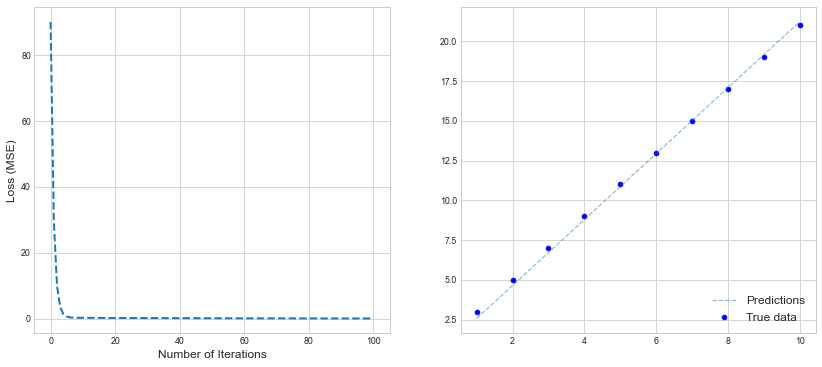

In [13]:
N = 10
X = np.linspace(1,N,N)
X = np.array(X,dtype=np.float32)
X = X.reshape(-1,1)
# y = 2x +1
y = np.dot(X,2) +1
y = np.array(y,dtype=np.float32)
y = y.reshape(-1,1)

if torch.cuda.is_available():
    X_tensor = Variable(torch.from_numpy(X).cuda())
    y_tensor = Variable(torch.from_numpy(y).cuda())
else:
    X_tensor = Variable(torch.from_numpy(X))
    y_tensor = Variable(torch.from_numpy(y))

# Defining model
input_Size, output_Size = 1, 1
model = LinearRegressionModel(input_Size, output_Size) # input and output size are 1

# GPU
if torch.cuda.is_available():
    model.cuda()

# MSE
MSE = nn.MSELoss()

# Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

loss_list = []
iteration_number = 101
print('---------------------------------------------------------')
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward modeling
    results = model(X_tensor)
    
    # Calculate Loss using MSE
    loss = MSE(results, y_tensor)
    
    # backward
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 10 == 0):
        print('Step = %i, MSE = %.4e' % (iteration, loss.data))
print('---------------------------------------------------------')

with torch.no_grad():
    if torch.cuda.is_available():
        Predicted = model(Variable(torch.from_numpy(X).cuda())).cpu().data.numpy()
    else:
        Predicted = model(Variable(torch.from_numpy(X))).data.numpy()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
_ = ax[0].plot(range(iteration_number), loss_list, linestyle='dashed', linewidth=2)
_ = ax[0].set_xlabel("Number of Iterations")
_ = ax[0].set_ylabel("Loss (MSE)")
    
_ = ax[1].scatter(X, y, label='True data', alpha=1, facecolor='blue')
_ = ax[1].plot(X, Predicted, '--', label='Predictions', alpha=0.5)
_ = ax[1].legend(loc='lower right', fontsize=12)

***
# Refrences
1. [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
***